In [4]:
import os
import sys
import torch

sys.path.append(f'../') # for xreal | yes i know this is not good practice
sys.path.append(f'../xreal') # for ldm
sys.path.append(f'../src') # for clip
sys.path.append(f'../src/taming-transformers') # for taming


from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image
from xreal import xRealModel, xrealAEModel
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda:0'

/home/aneeshashmi/repoCheck/xreal_check/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ldm_backbone_path = '../saved_models/backbone.pth'
ldm_ae_path = '../saved_models/ldm_ae.pth'
anatomy_controller_path = '../saved_models/anatomy_controller.pth'

## Load Model

In [6]:
xreal_t2i = xRealModel(
    model_path=ldm_backbone_path, 
    ae_path=ldm_ae_path,
    anatomy_controller_path=anatomy_controller_path, 
    device=device)

## Load Masks 

In [8]:
organ_mask = plt.imread("../assets/organ_2.png")[:,:,1]
organ_mask = (organ_mask - organ_mask.min()) / (organ_mask.max() - organ_mask.min())

organ_mask = (organ_mask)*4
path_mask = plt.imread("../assets/path_2.png")[:,:,0]
class_name = "Cardiomegaly"

(-0.5, 63.5, 63.5, -0.5)

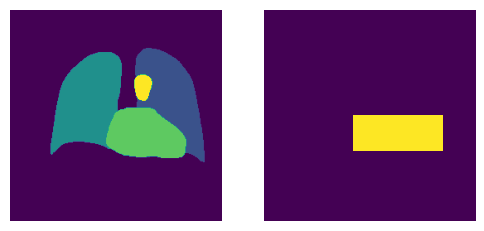

In [9]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(organ_mask)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(path_mask)
plt.axis('off')


## Inference

In [10]:
x_a_gen = xreal_t2i.sample_controlled(
    anatomy_mask=organ_mask,
    pathology_mask=path_mask,
    pathology = class_name,
    unconditional_guidance_scale = 7.0,
)

Generating Image...


(-0.5, 255.5, 255.5, -0.5)

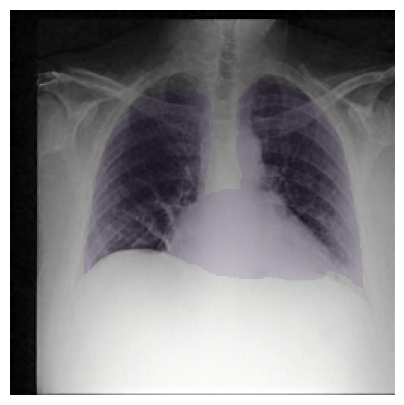

In [11]:
cmap_purple = plt.cm.Purples  # Choose any base colormap you prefer
cmap_colors_purple = cmap_purple(np.arange(cmap_purple.N))
cmap_colors_purple[:, -1] = np.linspace(0, 1, cmap_purple.N)  # Setting alpha values from 0 to 1
custom_cmap_purple = plt.cm.colors.ListedColormap(cmap_colors_purple)


plt.figure(figsize=(5, 5))
plt.imshow(x_a_gen)
plt.imshow(organ_mask>0.1, alpha=0.1, cmap=custom_cmap_purple)
plt.axis('off')